In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
from plotly import graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
feature_set = pd.read_csv(r"/Users/abhijit/Desktop/GIT_Projects/Original_iot/intl-iot/model/features-testing1.1/us/yi-camera.csv")
feature_set.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,157.304688,46,1214,17.791227,3.347432,11.540648,54.0,54.0,62.0,65.2,...,41.989793,6.161966,49,72,0,7,0,0,yi-camera,power
1,191.148438,46,1214,23.721635,2.685539,6.275311,50.0,54.0,54.0,62.0,...,35.508022,6.042936,64,57,0,7,0,0,yi-camera,power
2,151.257812,46,1214,17.791227,3.564460,13.417529,54.0,54.0,54.0,62.0,...,84.987377,8.759706,61,65,0,2,0,0,yi-camera,power
3,153.671875,46,1214,53.373680,3.875982,16.327205,54.0,54.0,62.0,66.0,...,32.392074,5.698209,44,78,0,6,0,0,yi-camera,power
4,186.500000,46,1214,26.686840,2.731627,6.242130,52.8,54.0,54.0,65.2,...,32.936597,5.764909,69,56,0,3,0,0,yi-camera,power


In [4]:
feature_set.state.value_counts()

android_lan_recording    440
android_lan_photo        430
android_wan_watch        400
android_wan_recording    400
android_wan_photo        400
android_lan_watch        370
power                     30
local_move                20
Name: state, dtype: int64

In [5]:
feature_values = feature_set.drop(['device','state'],axis=1)
feature_values.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,varTBP,medianTBP,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination
0,157.304688,46,1214,17.791227,3.347432,11.540648,54.0,54.0,62.0,65.2,...,0.028772,0.011935,41.989793,6.161966,49,72,0,7,0,0
1,191.148438,46,1214,23.721635,2.685539,6.275311,50.0,54.0,54.0,62.0,...,1.050957,0.013464,35.508022,6.042936,64,57,0,7,0,0
2,151.257812,46,1214,17.791227,3.564460,13.417529,54.0,54.0,54.0,62.0,...,0.366044,0.033653,84.987377,8.759706,61,65,0,2,0,0
3,153.671875,46,1214,53.373680,3.875982,16.327205,54.0,54.0,62.0,66.0,...,1.027490,0.012781,32.392074,5.698209,44,78,0,6,0,0
4,186.500000,46,1214,26.686840,2.731627,6.242130,52.8,54.0,54.0,65.2,...,1.082099,0.011935,32.936597,5.764909,69,56,0,3,0,0


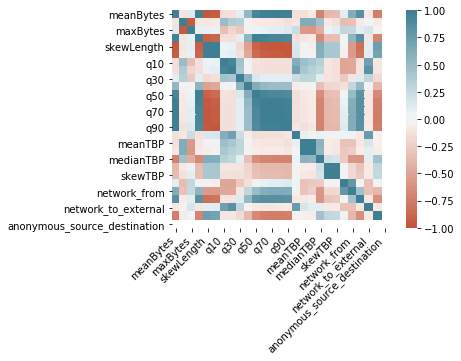

In [6]:
corr = feature_values.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

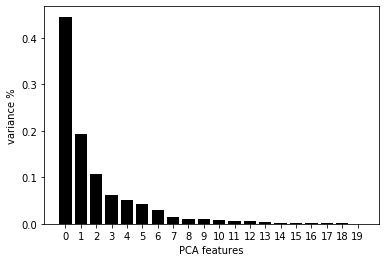

In [7]:
X_std = StandardScaler().fit_transform(feature_values)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [8]:
pca.explained_variance_ratio_

array([0.44571356, 0.19429614, 0.10694219, 0.06251995, 0.05077665,
       0.04256605, 0.02963986, 0.01509575, 0.01139753, 0.00985081,
       0.00782823, 0.00618224, 0.00571007, 0.00359072, 0.00198444,
       0.00135372, 0.0012004 , 0.00093308, 0.00065106, 0.00062309])

In [10]:
top_4_variable_explanation = abs(pca.components_[:4])
arr = []
for n in top_4_variable_explanation:
    top = n.argsort()[-5:][::-1]
    arr.append(top)
print(arr)

[array([ 0, 13, 12, 11, 14]), array([ 6,  7, 16,  1, 17]), array([15, 24,  2,  7,  1]), array([20, 19, 21,  9,  8])]


In [11]:
for n,i in enumerate(feature_values):
    print(n,i)

0 meanBytes
1 minBytes
2 maxBytes
3 medAbsDev
4 skewLength
5 kurtosisLength
6 q10
7 q20
8 q30
9 q40
10 q50
11 q60
12 q70
13 q80
14 q90
15 spanOfGroup
16 meanTBP
17 varTBP
18 medianTBP
19 kurtosisTBP
20 skewTBP
21 network_to
22 network_from
23 network_both
24 network_to_external
25 network_local
26 anonymous_source_destination


Text(0, 0.5, 'PCA 2')

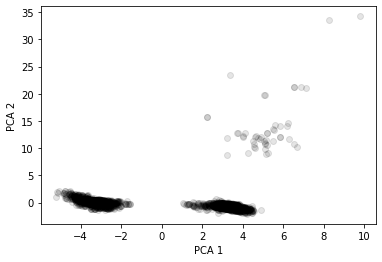

In [12]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Pre PCA

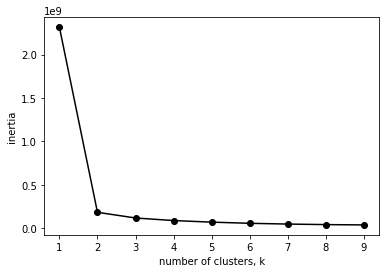

In [17]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(feature_values.iloc[:,:20])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Post PCA

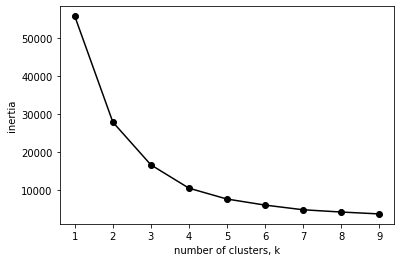

In [20]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()